# 内存向量存储

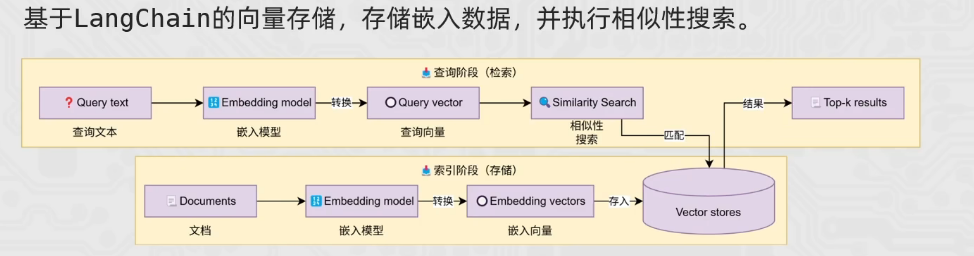

- 向量存储：
  - 文本转向量
  - 存入向量 `add_documents`
  - 删除向量 `delete`
  - 检索向量 `similarity_search`

In [1]:
from langchain_core.vectorstores import InMemoryVectorStore
from langchain_community.embeddings import DashScopeEmbeddings
from langchain_community.document_loaders import CSVLoader

In [2]:
vector_store = InMemoryVectorStore(
    embedding=DashScopeEmbeddings()
)

In [4]:
loader = CSVLoader(
    file_path="./data/info.csv",
    encoding="utf-8",
    source_column="source",     # 指定本条数据的来源是哪里
)
documents = loader.load()

In [5]:
vector_store.add_documents(
    documents=documents,        # 被添加的文档，类型：list[Document]
    ids=["id"+str(i) for i in range(1, len(documents)+1)] # 给添加的文档提供id（字符串）  list[str]
)

['id1', 'id2', 'id3', 'id4', 'id5', 'id6', 'id7', 'id8', 'id9', 'id10']

In [6]:
# 删除  传入[id, id...]
vector_store.delete(["id1", "id2"])

In [11]:
# 检索 返回类型list[Document]
result = vector_store.similarity_search(
    "Python",
    6       # 检索的结果要几个
)

print(result)

[Document(id='id5', metadata={'source': '传智教育', 'row': 4}, page_content='source: 传智教育\ninfo: Python学起来很简单的'), Document(id='id7', metadata={'source': '黑马程序员', 'row': 6}, page_content='source: 黑马程序员\ninfo: 努力带来成就，Python助力辉煌'), Document(id='id8', metadata={'source': '黑马程序员', 'row': 7}, page_content='source: 黑马程序员\ninfo: 学习Python的时候也要记得好好休息打打篮球'), Document(id='id6', metadata={'source': '黑马程序员', 'row': 5}, page_content='source: 黑马程序员\ninfo: 学习Python键盘敲烂月薪过万'), Document(id='id4', metadata={'source': '黑马程序员', 'row': 3}, page_content='source: 黑马程序员\ninfo: AI和Python是下一个十年的风口'), Document(id='id3', metadata={'source': '黑马程序员', 'row': 2}, page_content='source: 黑马程序员\ninfo: LangChain极大地方便了大模型开发')]


In [13]:
print(result[0])

page_content='source: 传智教育
info: Python学起来很简单的' metadata={'source': '传智教育', 'row': 4}
